In [40]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
data=pd.read_excel('US Data.xlsx')
dates=data[['Date']]
y=data['Last Price']
data.set_index('Date', inplace=True)
data=data.drop('Last Price', axis=1)

In [42]:
y.head()

0    71.6471
1    72.6843
2    73.2271
3    73.2157
4    74.2400
Name: Last Price, dtype: float64

In [43]:
data.describe()

Open Price  Financial Leverage        Volume     PE RATIO  \
count  1380.000000         1380.000000  1.380000e+03  1380.000000   
mean    137.631201            2.475385  4.050571e+07    15.359991   
std      39.028113            0.465252  2.118245e+07     2.504819   
min      71.801400            1.706700  1.136204e+07     9.962100   
25%     107.362500            2.098100  2.585018e+07    13.296450   
50%     127.015000            2.462000  3.488049e+07    15.714300   
75%     170.977500            2.851900  4.977487e+07    17.308525   
max     230.780000            3.285800  1.899781e+08    20.950300   

       Cash Flow Per Share  Price to Book Ratio  Dividend Per Share  \
count          1380.000000          1380.000000         1380.000000   
mean              3.233181             5.888355            0.575685   
std               1.298186             1.502929            0.097161   
min               1.678300             3.451400            0.435700   
25%               2.233000             4.725175            0.470000   
50%               2.967500             5.653150            0.570000   
75%               4.065900             6.482625            0.630000   
max               5.771300            10.298800            0.770000   

               SPX          VIX         PPUT  
count  1380.000000  1380.000000  1380.000000  
mean   2321.858167    14.952551   743.758797  
std     342.581722     4.147436    96.290575  
min    1741.890000     9.140000   593.430000  
25%    2047.092500    12.180000   665.707500  
50%    2180.385000    13.910000   696.495000  
75%    2658.585000    16.410000   835.547500  
max    3025.860000    40.740000   959.410000

Text(0.5, 1.0, 'Correlation between different fearures')

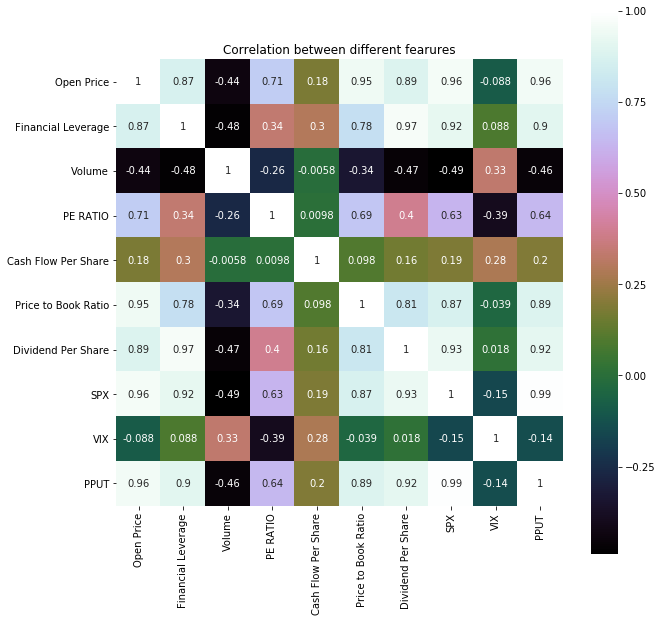

In [44]:
correlation = data.corr()
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [45]:
'''
scaler=MinMaxScaler(feature_range=(0,1))
scaled_X=scaler.fit_transform(data.values)
scaled_y=scaler.fit_transform(y.values)
'''

'\nscaler=MinMaxScaler(feature_range=(0,1))\nscaled_X=scaler.fit_transform(data.values)\nscaled_y=scaler.fit_transform(y.values)\n'

In [46]:
from sklearn.preprocessing import StandardScaler
X = data.values
y = y.values
split=int(len(y)*0.9)
print('split: ', split )
X_train=X[:split, :]
X_test=X[split:, :]
y_train=y[:split]
y_test=y[split:]
print(X_train.shape, y_train.shape)

sc = StandardScaler()   
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

split:  1242
(1242, 10) (1242,)


In [47]:
# Run the PCA algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principleComponents=pca.fit_transform(X_train)

In [ ]:
pca.transform()

Variance of each component: [6.19932235e-01 1.53423756e-01 9.06691282e-02 7.80900947e-02
 3.65813241e-02 1.30391445e-02 4.44974669e-03 2.51494984e-03
 1.17061723e-03 1.29003987e-04]

 Total Variance Explained: 100.0


Text(0, 0.5, 'cumulative explained variance')

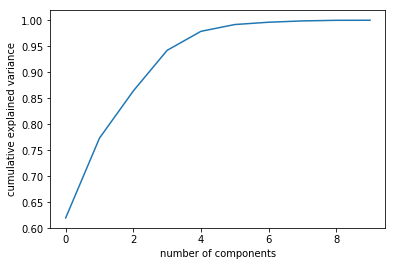

In [48]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [49]:
#from dimishing return graph above, 3 components seems to explain 95%
pca = PCA(n_components=3)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test) 
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.61993224 0.15342376 0.09066913]

 Total Variance Explained: 86.4


In [50]:
from sklearn.model_selection import TimeSeriesSplit
# Fitting Logistic Regression To the training set 
lr = linear_model.LinearRegression(normalize=True) 
lr.fit(X_train_pc, y_train)
#tscv = TimeSeriesSplit(n_splits=5)
#cv = KFold(n_splits=3,shuffle=True,random_state=45)
r2 = make_scorer(r2_score)
#r2_val_score = cross_val_score(lr, X_train_pc, y_train, cv=tscv,scoring=r2)
#scores=[r2_val_score.mean()]
print('r2 scores: ', scores)


r2 scores:  [0.47185572309914914]


In [51]:
lr.score(X_train_pc, y_train)

0.980898893010473

In [52]:
lr.score(X_test_pc, y_test)

0.6328531481256643

In [53]:
y_pred=lr.predict(X_test_pc)
mse=mean_squared_error(y_test, y_pred)
print('linear regression mse: ', mse)

linear regression mse:  98.52767454712009


In [54]:
dates

Date
0    2014-02-03
1    2014-02-04
2    2014-02-05
3    2014-02-06
4    2014-02-07
5    2014-02-10
6    2014-02-11
7    2014-02-12
8    2014-02-13
9    2014-02-14
10   2014-02-18
11   2014-02-19
12   2014-02-20
13   2014-02-21
14   2014-02-24
15   2014-02-25
16   2014-02-26
17   2014-02-27
18   2014-02-28
19   2014-03-03
20   2014-03-04
21   2014-03-05
22   2014-03-06
23   2014-03-07
24   2014-03-10
25   2014-03-11
26   2014-03-12
27   2014-03-13
28   2014-03-14
29   2014-03-17
...         ...
1350 2019-06-14
1351 2019-06-17
1352 2019-06-18
1353 2019-06-19
1354 2019-06-20
1355 2019-06-21
1356 2019-06-24
1357 2019-06-25
1358 2019-06-26
1359 2019-06-27
1360 2019-06-28
1361 2019-07-01
1362 2019-07-02
1363 2019-07-03
1364 2019-07-05
1365 2019-07-08
1366 2019-07-09
1367 2019-07-10
1368 2019-07-11
1369 2019-07-12
1370 2019-07-15
1371 2019-07-16
1372 2019-07-17
1373 2019-07-18
1374 2019-07-19
1375 2019-07-22
1376 2019-07-23
1377 2019-07-24
1378 2019-07-25
1379 2019-07-26

[1380 rows x 1 columns]

In [55]:
my_pred = dates.tail(138)
my_pred['val'] = y_pred

In [56]:
actual_test = dates.tail(138)
actual_test['val'] = y_test

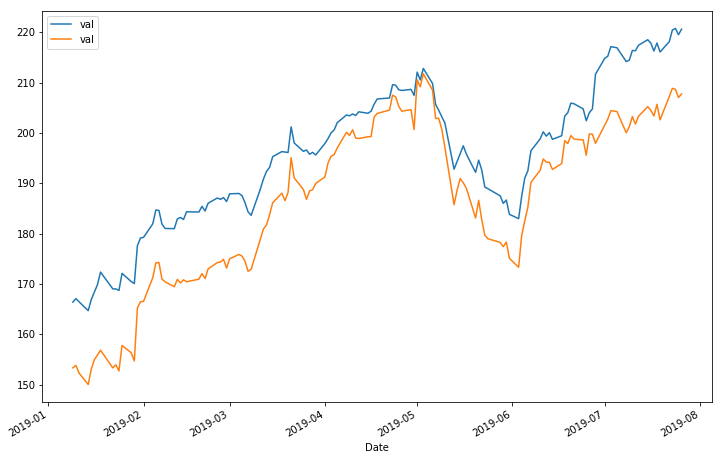

In [57]:
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(111)
my_pred.set_index('Date').plot(kind = 'line', label = 'Prediction', ax = ax1)
actual_test.set_index('Date').plot(kind = 'line', label = 'Actual', ax = ax1)
plt.legend()

In [58]:
y_pred.shape

(138,)

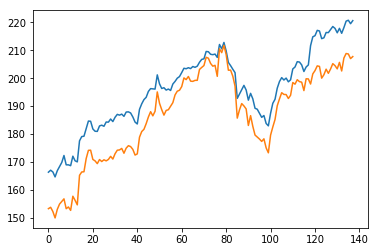

In [59]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()


In [62]:
from sklearn.feature_selection import RFE
# Fitting Logistic Regression To the training set 
lr = linear_model.LinearRegression(normalize=True) 

#Initializing RFE model
rfe = RFE(lr, 3)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
lr.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)
'''
lr.fit(X_train, y_train)
cv = KFold(n_splits=3,shuffle=True,random_state=45)
r2 = make_scorer(r2_score)
r2_val_score = cross_val_score(lr, X_train, y_train, cv=cv,scoring=r2)
scores=[r2_val_score.mean()]
print('r2 scores: ', scores)
'''
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print('linear regression mse: ', mse)

[ True False False False False  True False  True False False]
[1 4 7 5 8 1 3 1 6 2]


ValueError: shapes (138,10) and (3,) not aligned: 10 (dim 1) != 3 (dim 0)

In [86]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)

model=sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.879e+04
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:28:08   Log-Likelihood:                -2051.7
No. Observations:                1104   AIC:                             4125.
Df Residuals:                    1093   BIC:                             4180.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.6115      0.047   2931.671      0.000     137.519     137.704
x1            33.9808      0.408     83.299      0.000      33.180      34.781
x2             0.7441      0.346      2.148      0.032       0.064       1.424
x3            -0.0755      0.061     -1.245      0.213      -0.195       0.043
x4             0.6400      0.141      4.551      0.000       0.364       0.916
x5             0.1270      0.063      2.012      0.045       0.003       0.251
x6             2.3209      0.225     10.321      0.000       1.880       2.762
x7            -0.4469      0.255     -1.755      0.080      -0.947       0.053
x8             5.8187      0.815      7.135      0.000       4.219       7.419
x9             0.0036      0.073      0.049      0.961      -0.139       0.147
x10           -3.7646      0.596     -6.313      0.000      -4.935      -2.594
==============================================================================
Omnibus:                       98.181   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.063
Skew:                           0.160   Prob(JB):                    5.33e-118
Kurtosis:                       6.411   Cond. No.                         55.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def test_model(clf):
        
        clf.score(train, labels)
        return scores

In [38]:
def lets_try(train,labels):
    '''
    Function to try out multiple forms of regression on my dataset
    Train = training dataset
    Label = target variable
    '''
    results={}
    print('train shape: ', train.shape)
    print('train shape: ', labels.shape)

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
       
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    '''
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    '''
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

#lets_try(data.values,y.values)

In [ ]:
lets_try()

In [28]:
y.values

array([[ 71.6471],
       [ 72.6843],
       [ 73.2271],
       ...,
       [208.67  ],
       [207.02  ],
       [207.74  ]])